# 1 Objective
Carry out exploratory analysis of anime dataset. Questions of interest include:
- What are the most highly rated genres?
- What studios produce the highest rated anime?

In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#Load dataset
data = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Exploratory  Data Analysis\\Anime Data\\dataanime.csv')

#Make a copy of the dataset
raw_data = data[:]

In [36]:
#Examine the first few rows 
raw_data.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


Observations
- The description column will not be necessary for our analysis and will be dropped.
- Given my experience in the anime community, I am aware that a large chunk of people watching these shows use illegal sites (unfortunate reality). This means individuals will often not keep track with broadcast times and wait until a proper translation of the episode or movie is out. So broadcast time is also unnecessary and will be dropped.
- People also tend to care more about the producers than who the lisencors and producers are so these will also be dropped.
- When the anime started and ended airing also does not seem to be particularly relevant in my experience.
- as most tv shows have similar episode duration, duration seems a bit redundant and unnessecary and so it will be dropped. The same for movies.
- There are numerous unique anime out there so title will also be dropped.

In [37]:
#Observe the shape of the data set and datatypes of the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
Title              1563 non-null object
Type               1563 non-null object
Episodes           1563 non-null object
Status             1563 non-null object
Start airing       1563 non-null object
End airing         1563 non-null object
Starting season    1563 non-null object
Broadcast time     1563 non-null object
Producers          1563 non-null object
Licensors          1563 non-null object
Studios            1563 non-null object
Sources            1563 non-null object
Genres             1563 non-null object
Duration           1563 non-null object
Rating             1563 non-null object
Score              1563 non-null float64
Scored by          1563 non-null int64
Members            1563 non-null int64
Favorites          1563 non-null int64
Description        1563 non-null object
dtypes: float64(1), int64(3), object(16)
memory usage: 244.3+ KB


Observations
- There seems to be no missing values indicated. However we know this is not the case from our earlier observations of the dataset. We know that in place of missing values a hyphen or nan is added. So we will change the hyphens/nan to missing values and then check how many missing values there are in the dataset
- Once the other columns are dropped starting season will have the most amount of missing values. We can try filling the missing values by examining the start date and mapping it to the appropriate season.
- Once starting season is filled we will drop all other rows with missing values. There is no way to fill these missing values without guessing and this won't be a very useful approach.

# 2 Data Cleaning

In [38]:
raw_data = raw_data.replace(['-', 'nan'], np.nan)

In [39]:
#examine number of missing values per column
raw_data.isnull().sum()

Title                 0
Type                  0
Episodes             11
Status                0
Start airing         14
End airing          585
Starting season     742
Broadcast time     1009
Producers           376
Licensors           607
Studios              46
Sources             100
Genres                0
Duration              4
Rating                0
Score                 0
Scored by             0
Members               0
Favorites             0
Description          12
dtype: int64

In [40]:
#Subset dataset so that we only have rows where start airing is not a null value for use when mapping start airing to start season
raw_data = raw_data[raw_data['Start airing'].notna()]

In [41]:
seasons = {}
for val in range(1, 13):
    if val == 1 or val == 2 or val == 3:
        seasons[val] = 'Winter'
    elif val == 4 or val == 5 or val == 6:
        seasons[val] = 'Spring'
    elif val == 7 or val == 8 or val == 9:
        seasons[val] = 'Summer'
    else:
        seasons[val] = 'Fall'

In [42]:
#Fill the starting season column missing values based on values in start airing date

#dictionary of seasons for mapping
seasons = {}
for val in range(1, 13):
    if val == 1 or val == 2 or val == 3:
        seasons[val] = 'Winter'
    elif val == 4 or val == 5 or val == 6:
        seasons[val] = 'Spring'
    elif val == 7 or val == 8 or val == 9:
        seasons[val] = 'Summer'
    else:
        seasons[val] = 'Fall'
        
#convert start date to numeric value of first month aired
month = []
for date in raw_data['Start airing']:
    m = date.split('-')[1]
    month.append(int(m))
raw_data['Start airing'] = month
raw_data['Starting season'] = raw_data['Starting season'].fillna(raw_data['Start airing'].map(seasons))

In [43]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1562
Data columns (total 20 columns):
Title              1549 non-null object
Type               1549 non-null object
Episodes           1538 non-null object
Status             1549 non-null object
Start airing       1549 non-null int64
End airing         978 non-null object
Starting season    1549 non-null object
Broadcast time     554 non-null object
Producers          1185 non-null object
Licensors          956 non-null object
Studios            1505 non-null object
Sources            1455 non-null object
Genres             1549 non-null object
Duration           1545 non-null object
Rating             1549 non-null object
Score              1549 non-null float64
Scored by          1549 non-null int64
Members            1549 non-null int64
Favorites          1549 non-null int64
Description        1537 non-null object
dtypes: float64(1), int64(4), object(15)
memory usage: 254.1+ KB


In [44]:
#Drop irrelevant columns
raw_data = raw_data.drop(['Title', 'Start airing', 'End airing', 'Broadcast time', 'Producers', 'Licensors', 'Duration', 'Description'], axis = 1)

In [45]:
#Drop all remaining rows with missing values
clean_data = raw_data.dropna()
clean_data.isnull().sum().sum()

0

In [46]:
#Transform remaining columns to appropriate datatypes
clean_data['Episodes'] = clean_data['Episodes'].astype('int64')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1562
Data columns (total 12 columns):
Type               1414 non-null object
Episodes           1414 non-null int64
Status             1414 non-null object
Starting season    1414 non-null object
Studios            1414 non-null object
Sources            1414 non-null object
Genres             1414 non-null object
Rating             1414 non-null object
Score              1414 non-null float64
Scored by          1414 non-null int64
Members            1414 non-null int64
Favorites          1414 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 143.6+ KB


C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 3 Data Visualization

In [47]:
#Create list of categorical and numeric columns
col_list = clean_data.columns
cat_cols = [col for col in col_list if clean_data[col].dtype == 'object']
num_cols = [col for col in col_list if clean_data[col].dtype != 'object']

#### Distribution of Scores

<Figure size 1440x1440 with 0 Axes>

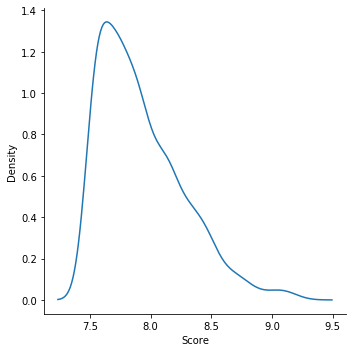

In [48]:
plt.figure(figsize=(20,20))
sns.displot(clean_data, x = 'Score', kind = 'kde')

#### Distribution of Categorical Features

In [49]:
def cat_dist(cat_col):
    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        sns.countplot(x = col, data = clean_data, order = clean_data[col].value_counts().index, ax = axe)
        plt.tight_layout()

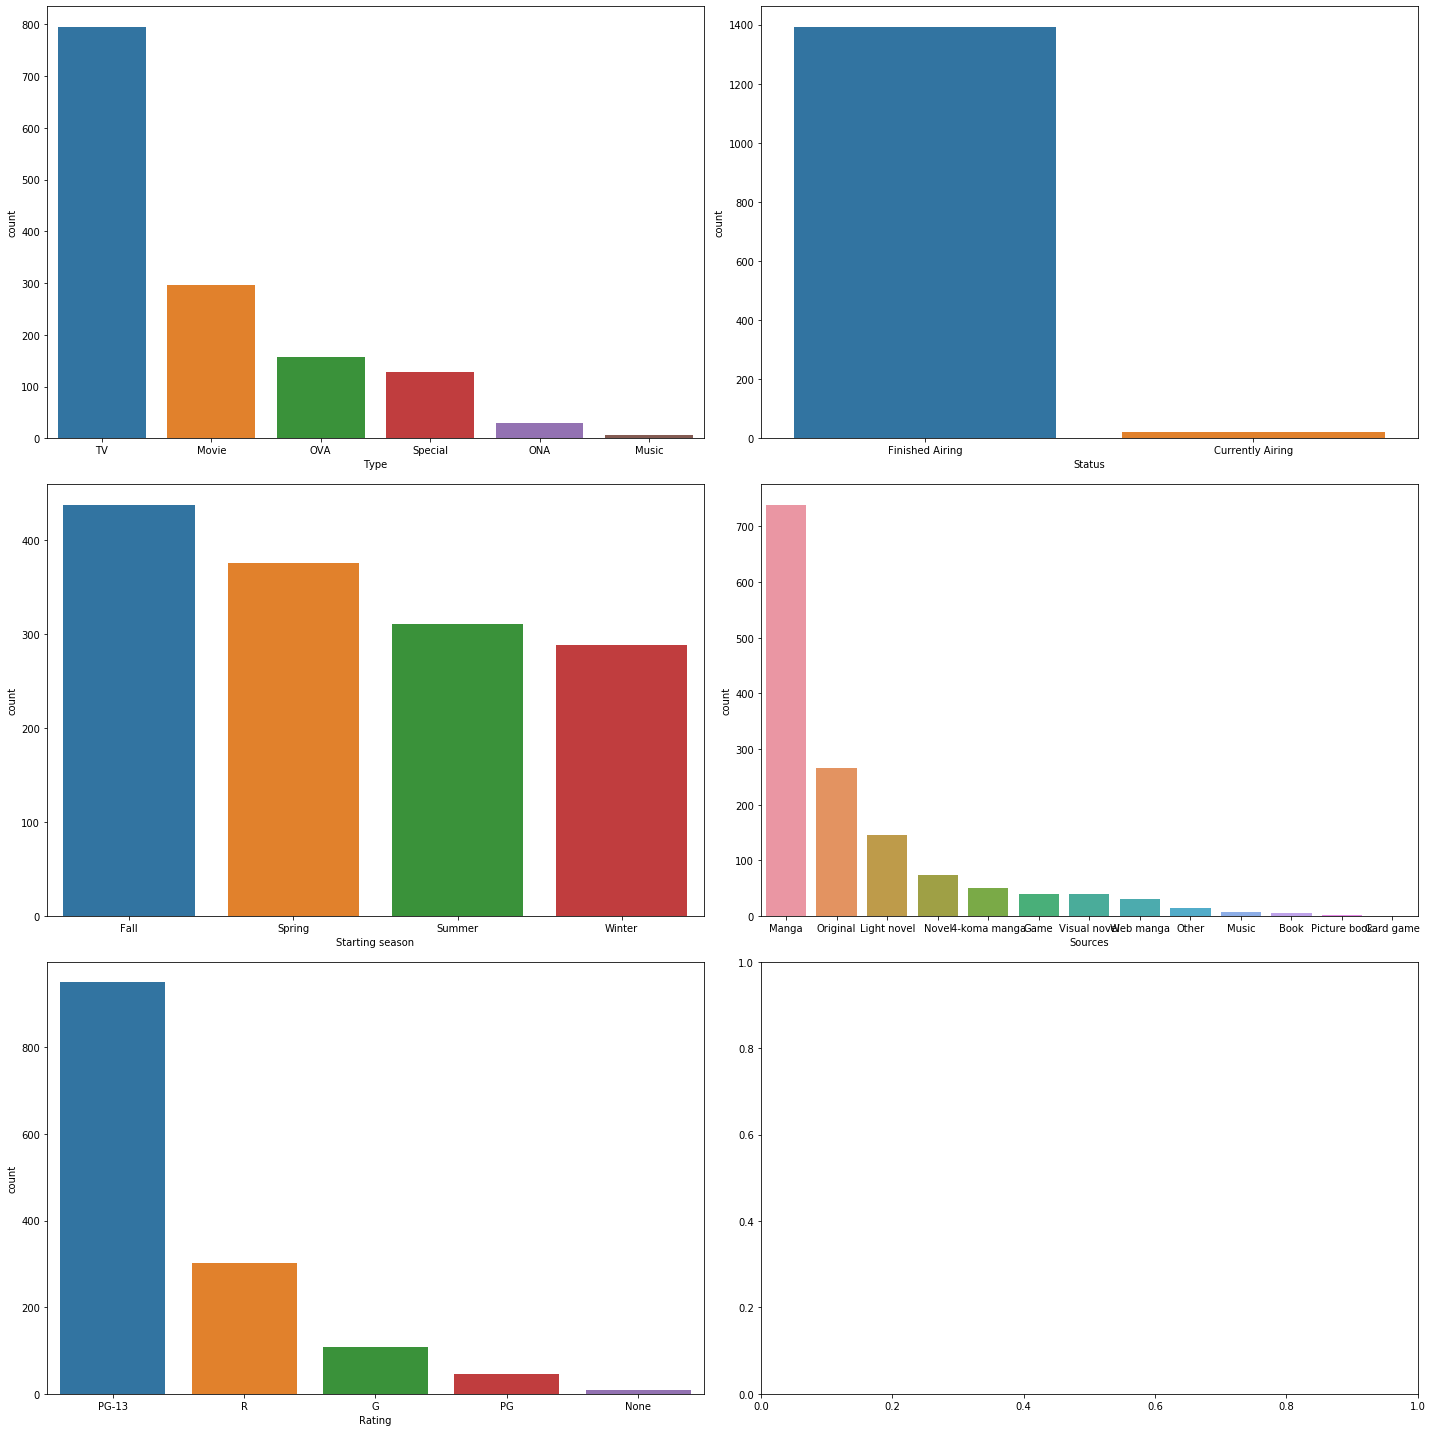

In [50]:
catlist = [cat_cols[i] for i in [0, 1, 2, 4, 6]]
cat_dist(catlist)

Observations
- The distributions of the charts are in line with what I know of the industry
    - Most anime released are indeed made for tv and are tv shows
    - Of note is the fact that the fall season sees more releases of anime
    - Most anime are adapted from manga
    - And its accurate that the target audience tends to be teens between the age of 13-18

In [51]:
ani_genres = clean_data['Genres']
genre_list = list(ani_genres)
agenres = {}
for genre in genre_list:
    if ',' in genre:
        genre2 = genre.split(',')
        for gen in genre2:
            if gen not in agenres:
                agenres[gen] = 1
            else:
                agenres[gen] += 1
    else:
        if genre not in agenres:
            agenres[genre] = 1
        else:
            agenres[genre] += 1
#print(agenres)

In [52]:
#create a datafram from the dictionary ggenres for easier manipulation and visualization
adf = pd.DataFrame(agenres.items(), columns=["Genre", "# of Anime"])
adf.head()

,Genre,# of Anime
0,Action,520
1,Military,117
2,Adventure,314
3,Comedy,687
4,Drama,477


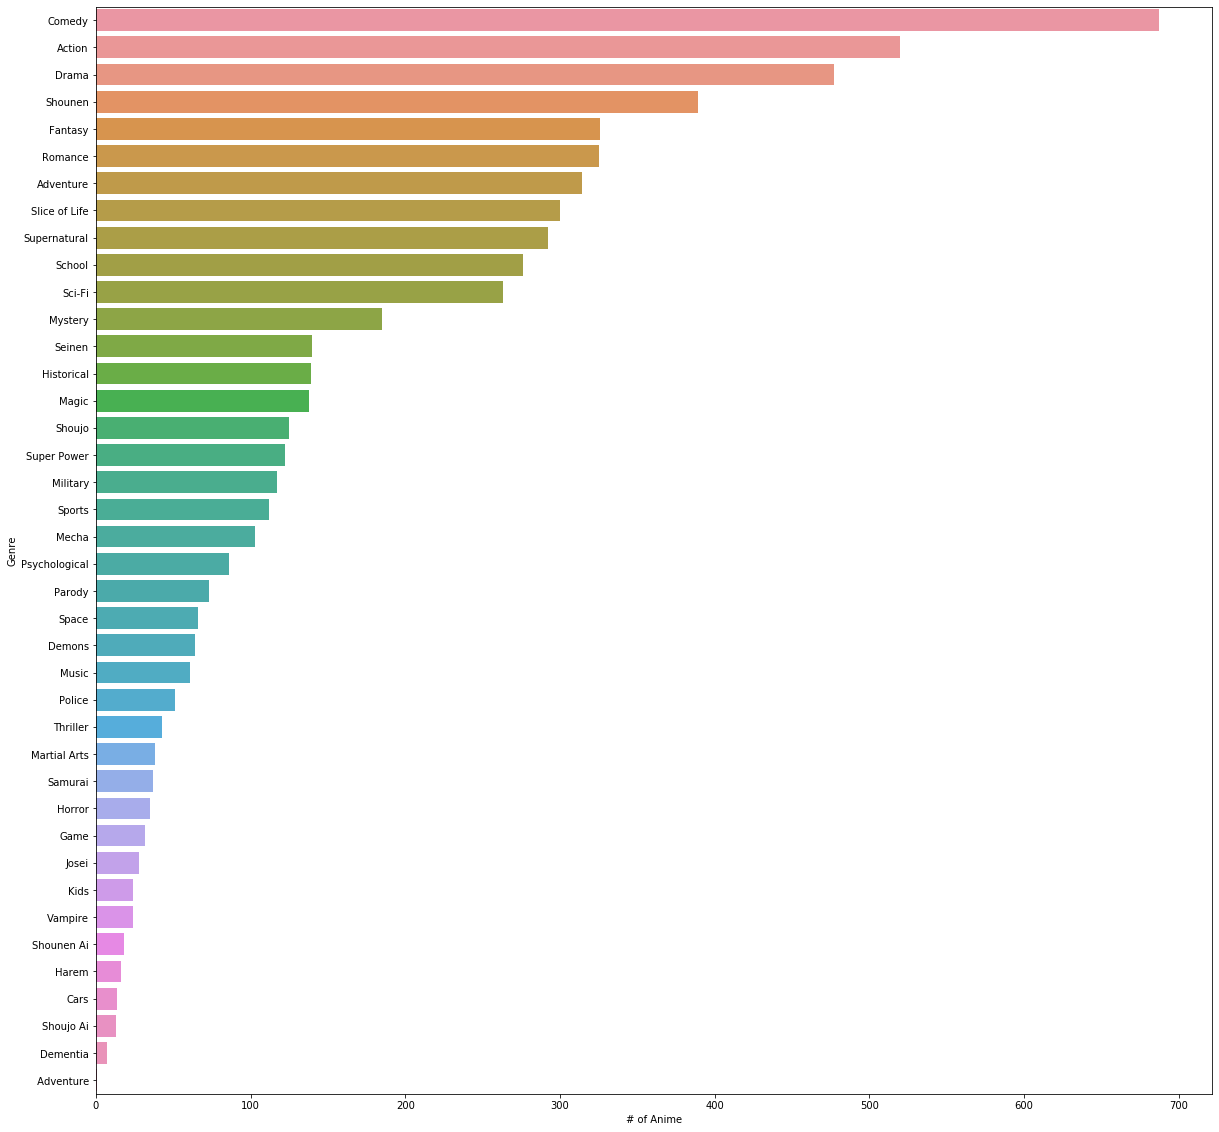

In [53]:
plt.figure(figsize=(20,20))
sns.barplot(x = '# of Anime', y = 'Genre', data = adf, order = adf.sort_values('# of Anime', ascending = False).Genre)

In [54]:
studios = clean_data['Studios']
studio_list = list(studios)
studio_dict = {}
for studio in studio_list:
    if ',' in studio:
        studio2 = studio.split(',')
        for stu in studio2:
            if stu not in studio_dict:
                studio_dict[stu] = 1
            else:
                studio_dict[stu] += 1
    else:
        if studio not in studio_dict:
            studio_dict[studio] = 1
        else:
            studio_dict[studio] += 1
#print(studio_dict)

In [55]:
#create a datafram from the dictionary ggenres for easier manipulation and visualization
sdf = pd.DataFrame(studio_dict.items(), columns=["Studio", "# of Anime"])
sdf.head()

,Studio,# of Anime
0,Bones,53
1,CoMix Wave Films,6
2,Bandai Namco Pictures,7
3,White Fox,12
4,Artland,11


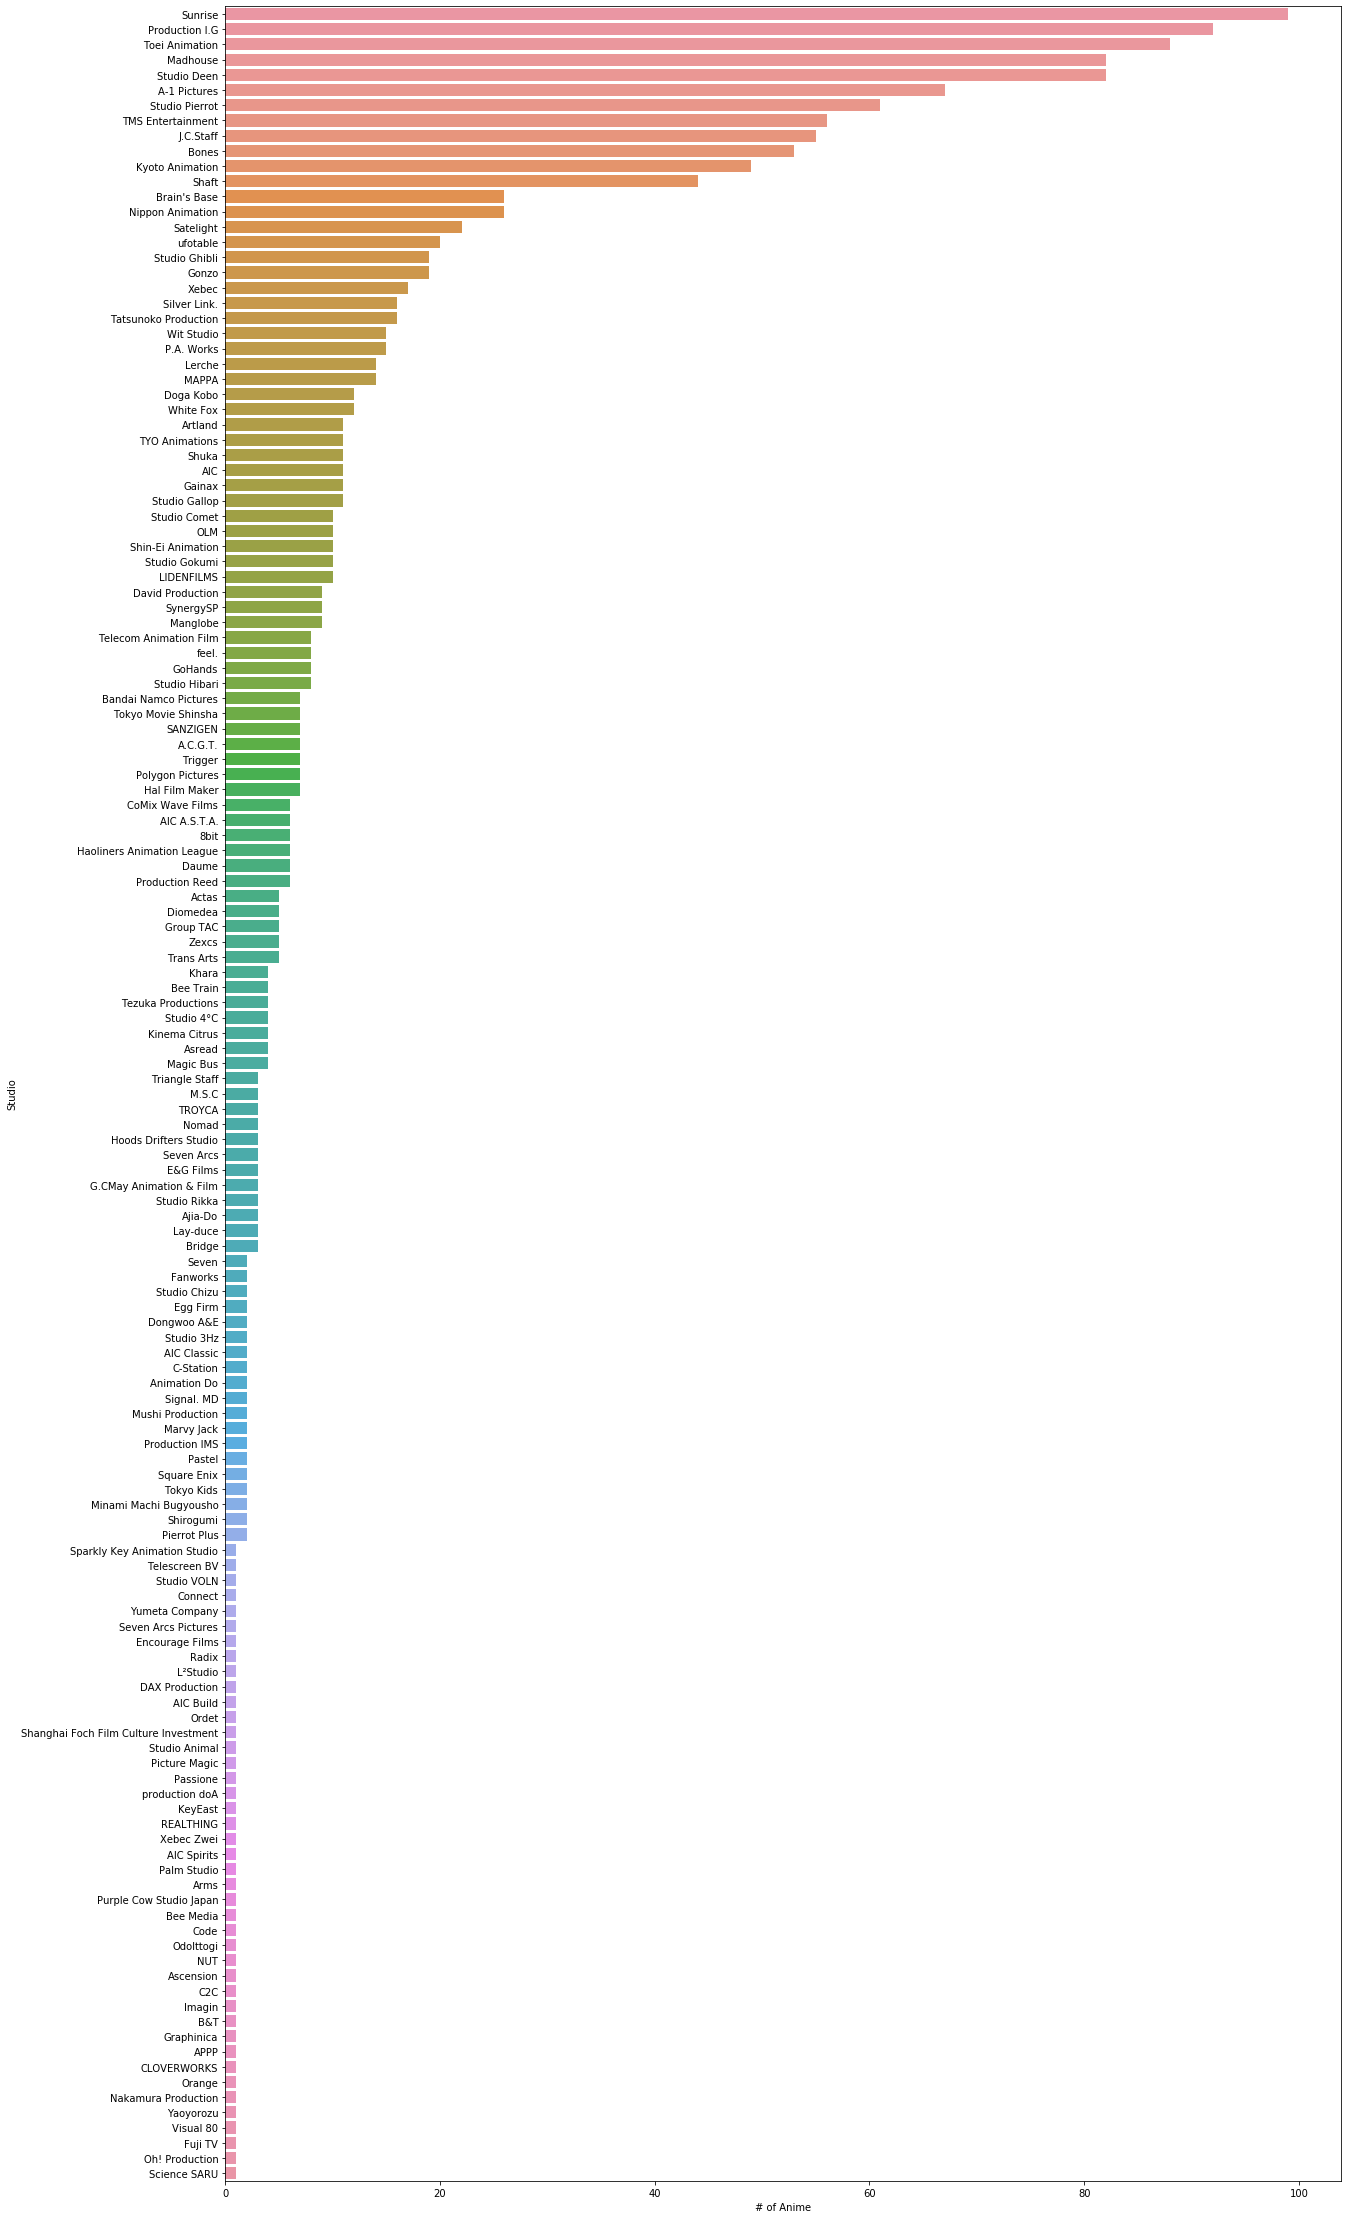

In [56]:
plt.figure(figsize=(20,40))
sns.barplot(x = '# of Anime', y = 'Studio', data = sdf, order = sdf.sort_values('# of Anime', ascending = False).Studio)

Observations
- The top 10 genres and studios are close to what I expected.
- I'm actually surprised to see comedy as the most common genre. I was expecting action to be at the top. Granted its still in the top 2.
- I'm also surprised to see Sunrise and Production I.G so high in the studios with the highest number of anime. I was expecting Toei and Studio Pierrot to actually be the top 2.

#### Categorical Features and their relationship with Score

In [57]:
def cat_avg(cat_col):
    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        scores = clean_data.groupby(col)['Score'].mean().sort_values(ascending = False)
        sns.boxplot(x = col, y = 'Score', data = clean_data, order = scores.index, ax = axe)
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

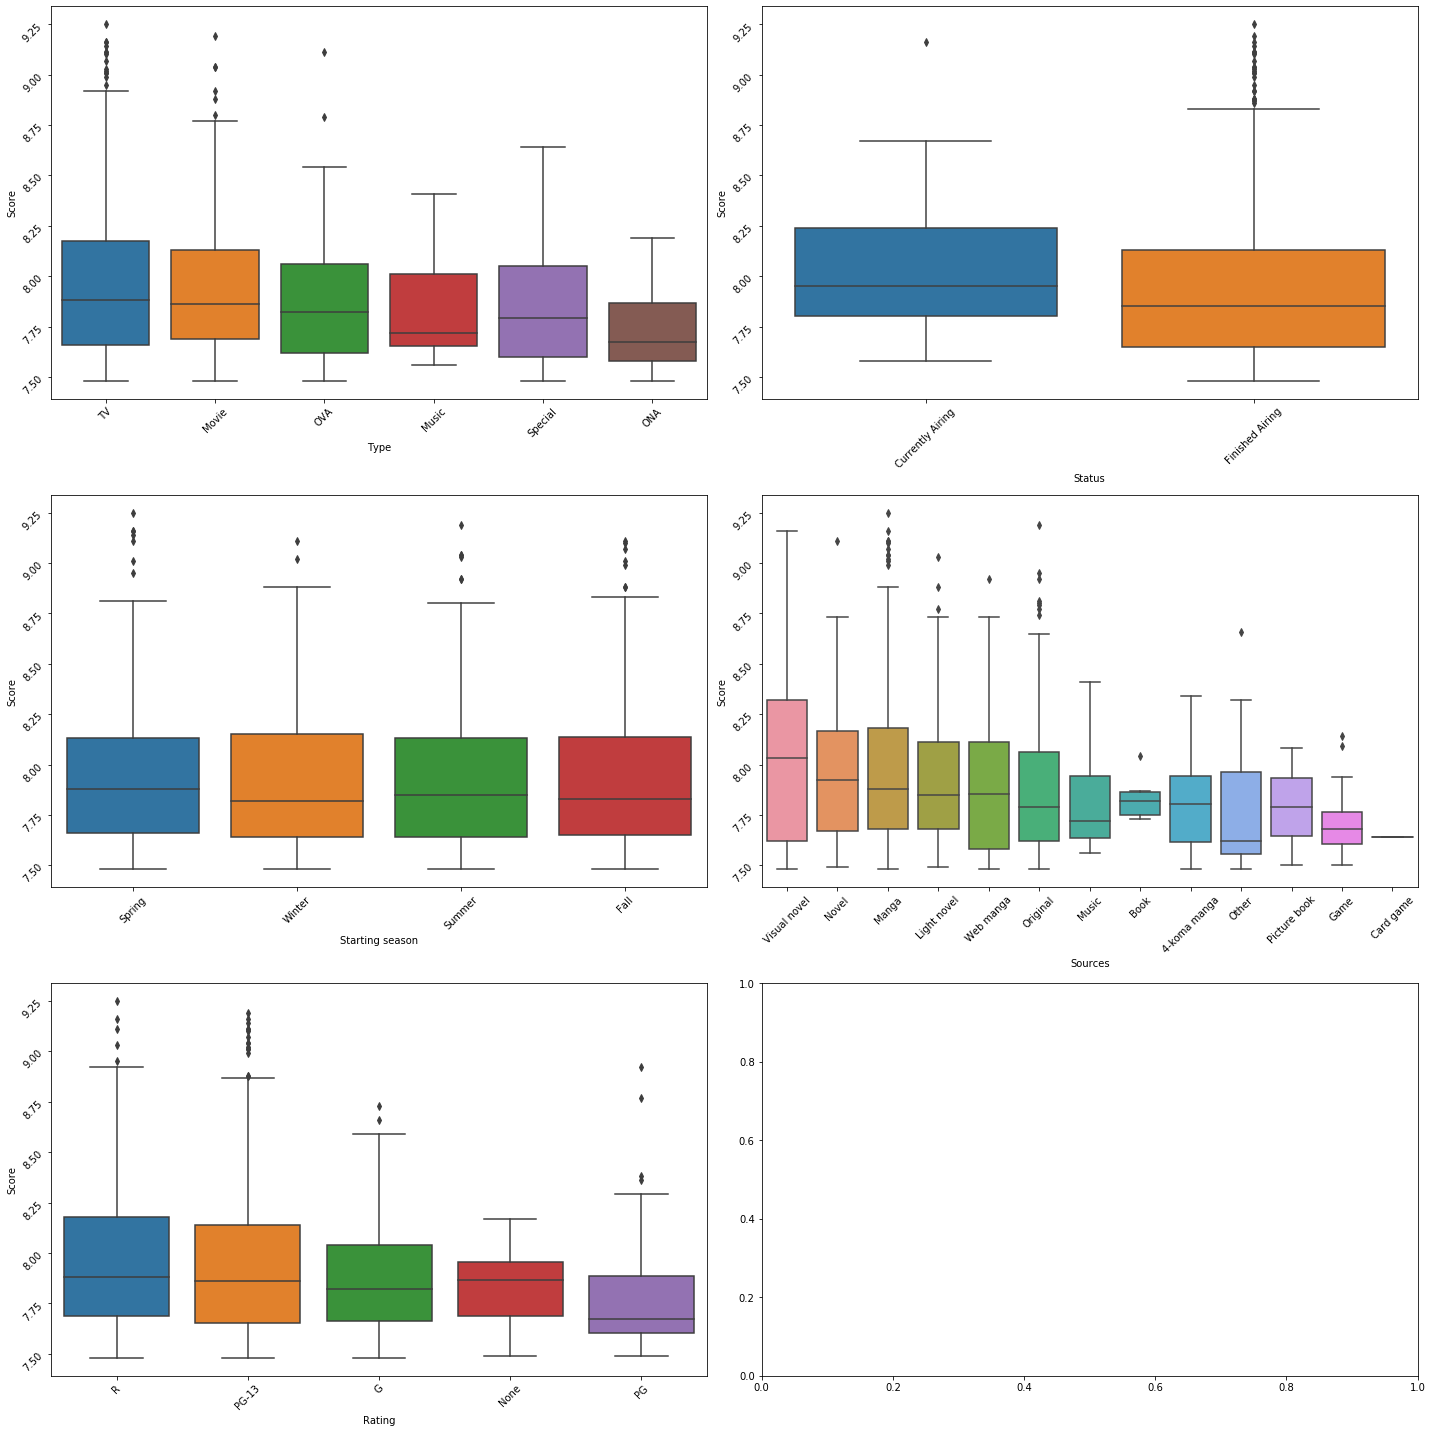

In [58]:
cat_avg(catlist)

Observations
- There does not seem to be much difference between any of the categories of the categorical variables and how their average score.

#### Numerical Features and their relationship with Score

In [59]:
numlist = [num_cols[i] for i in [0, 2, 3, 4]]
numlist

['Episodes', 'Scored by', 'Members', 'Favorites']

In [60]:
def num_avg(num_col):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    axes = axes.flatten()
    for col, axe in zip(num_col, axes):
        scores = clean_data['Score'].mean()
        sns.regplot(x = col, y = 'Score', data = clean_data, ax = axe)
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

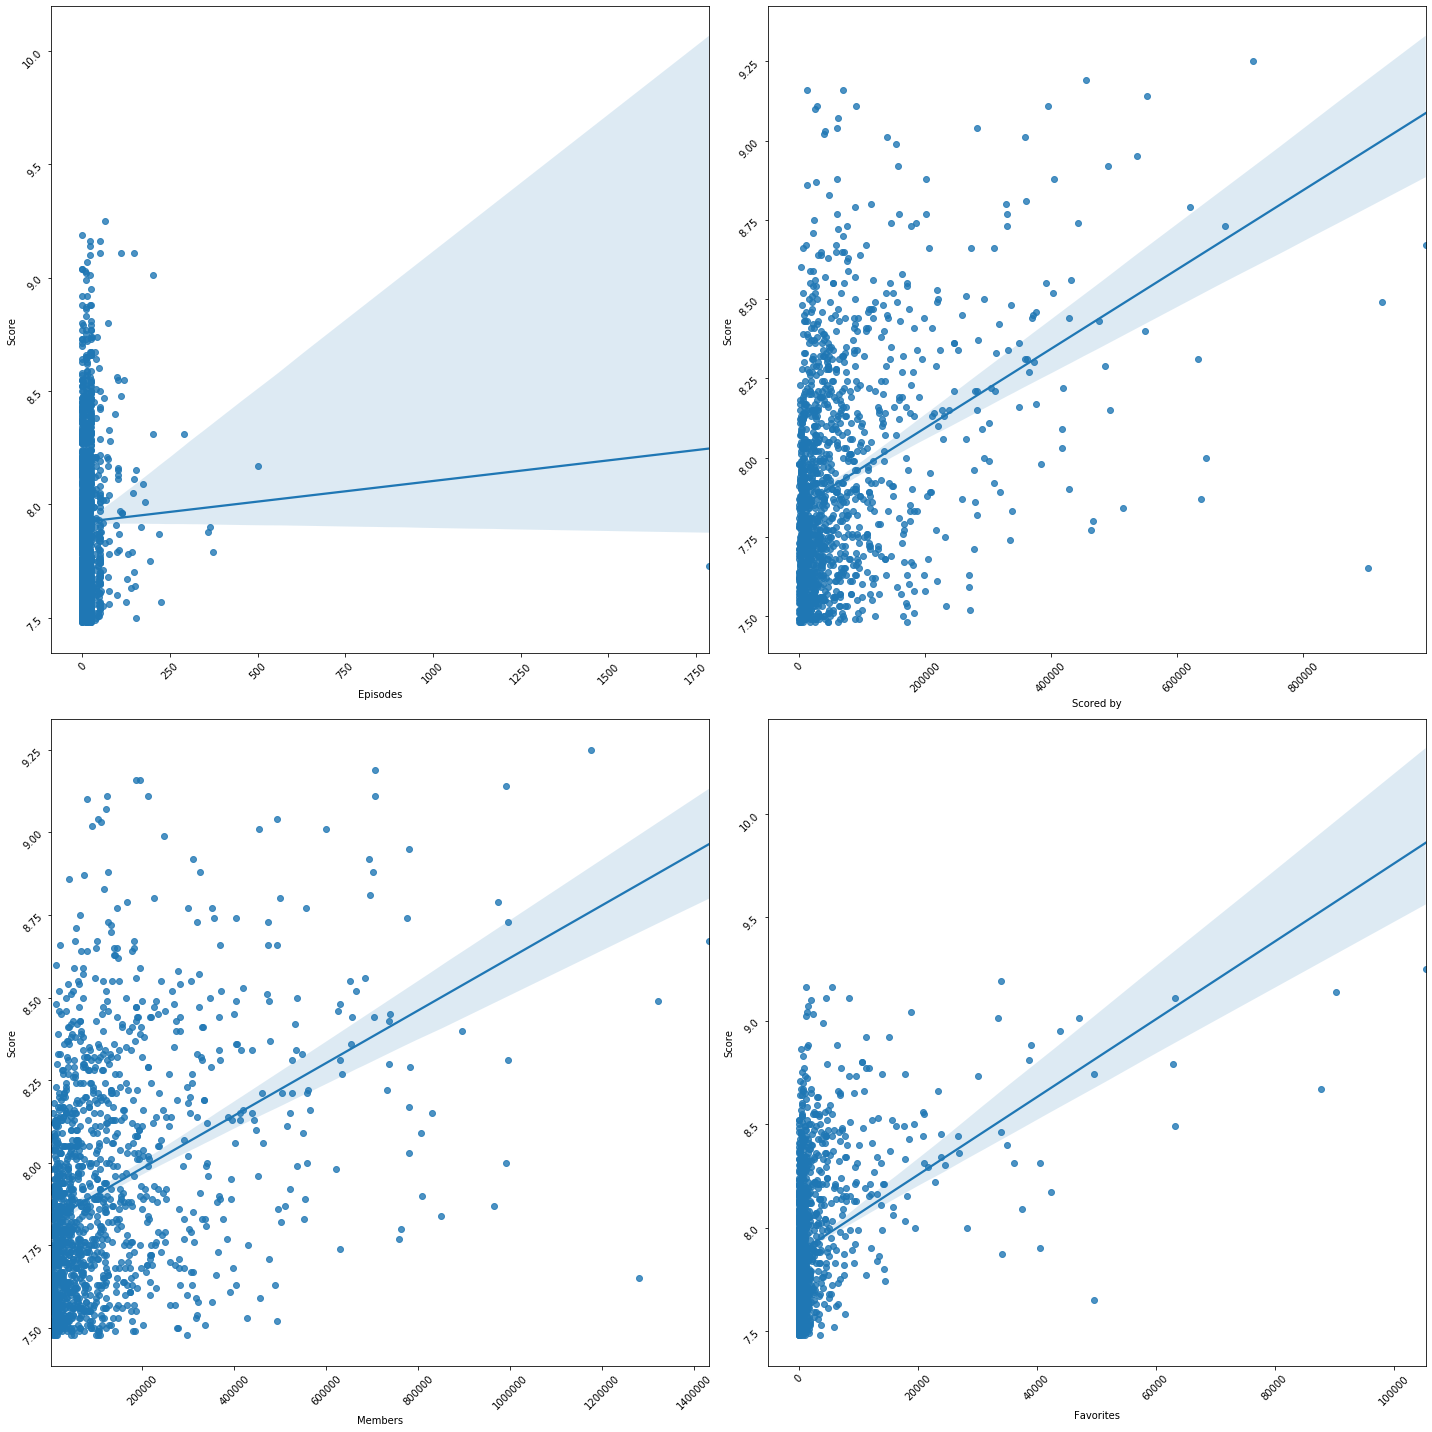

In [61]:
num_avg(numlist)

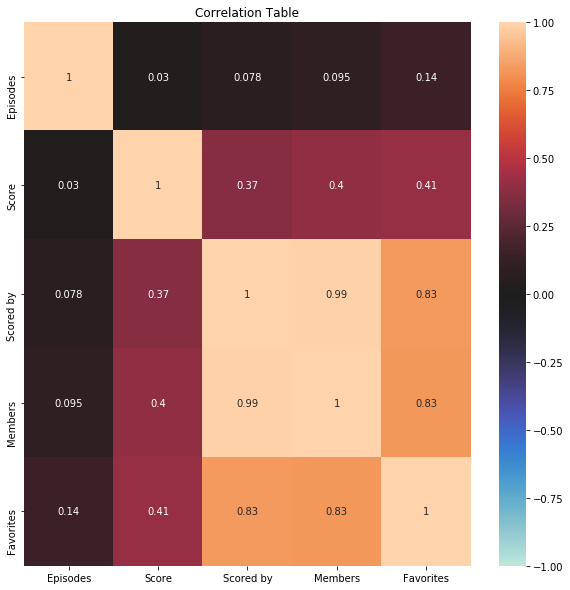

In [63]:
#correlation matrix
corr = clean_data[num_cols].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Table')
#plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\correlation table.png', bbox_inches='tight')
plt.show()

Observations
- There does not seem to be much of correlation between number of episodes and how an anime is scored showing that it does not matter the length of the series.
- Members, Favorites and Scored by all have a similar positive correlation with Score. If we were to do a regression analysis they would be dropped bar one for multicollinearity.

#### Genre and Studio Relation to Scores

In [94]:
genre_data = clean_data[['Genres', 'Score']]
studio_data = clean_data[['Studios', 'Score']]

In [82]:
#convert series into string using str method
#split the string on basis of pipe delimiter
#convert the series into list uing to_list method
#stack performs the final step of transpose or pivot

df1 = pd.DataFrame(genre_data['Genres'].str.split(',').to_list(), index = genre_data['Score']).stack()
df1
df_new = df1.reset_index([0, 'Score'])
df_new.columns = ['Score', 'Genre']
df_new

,Score,Genre
0,9.25,Action
1,9.25,Military
2,9.25,Adventure
3,9.25,Comedy
4,9.25,Drama
...,...,...
6076,7.48,Super Power
6077,7.48,Mystery
6078,7.48,Comedy
6079,7.48,Super Power


In [97]:
df2 = pd.DataFrame(studio_data['Studios'].str.split(',').to_list(), index = studio_data['Score']).stack()
df2
df_new2 = df2.reset_index([0, 'Score'])
df_new2.columns = ['Score', 'Studio']
df_new2

,Score,Studio
0,9.25,Bones
1,9.19,CoMix Wave Films
2,9.16,Bandai Namco Pictures
3,9.16,White Fox
4,9.14,White Fox
...,...,...
1515,7.48,TMS Entertainment
1516,7.48,A-1 Pictures
1517,7.48,feel.
1518,7.48,Studio Pierrot


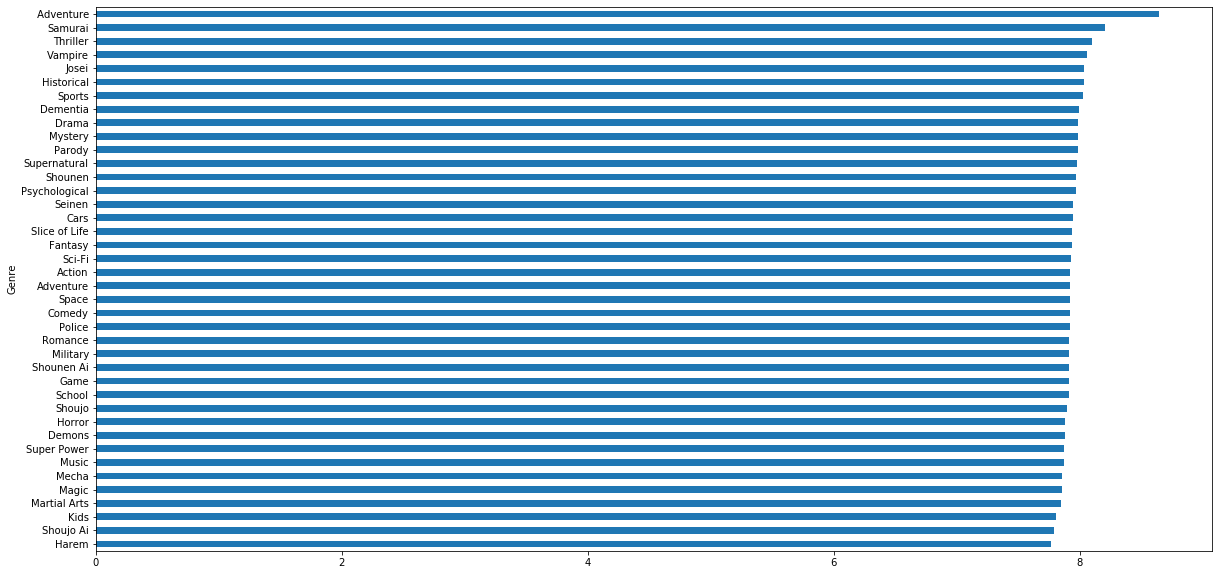

In [106]:
plt.figure(figsize=(20,10))
df_new.groupby('Genre')['Score'].mean().sort_values().plot.barh()

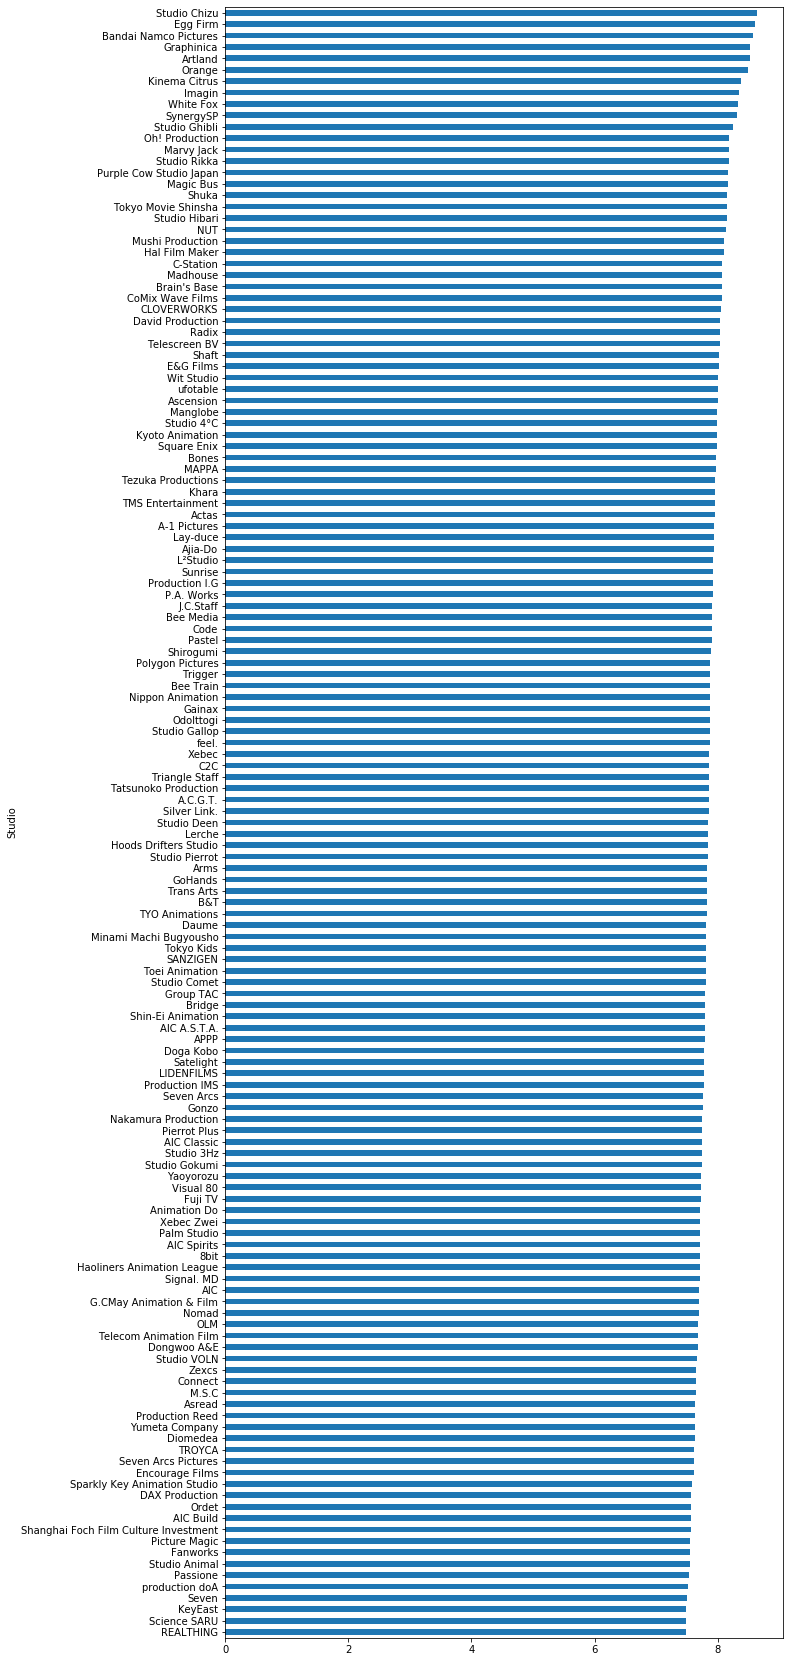

In [104]:
plt.figure(figsize=(10,30))
df_new2.groupby('Studio')['Score'].mean().sort_values().plot.barh()

Observations
- There does not seem to be a significant difference between the genres and their scores as they all seem to have a similar average scores.
- Similarly there does not seem to be much difference in the average scores of the anime produced per studio.
- The top 10 studios with the highest scores on average is surprising. But I think this is due to having a small sample size. It would be interesting to see how all these charts change with a larger sample size.